### Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:

from sklearn.linear_model import LinearRegression
# Lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [6]:
from statsmodels.tsa.arima.model import ARIMA                      
import torch                                                       
import torch.nn as nn                                              
import torch.optim as optim     

In [7]:
df1 = pd.read_csv("data/train.csv")
print(df1.shape)

(10683, 12)


In [8]:
df1.head(5)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2024,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3312.45
1,1,Air India,1/05/2024,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,6512.70
2,2,Jet Airways,9/06/2024,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,11799.70
3,3,IndiGo,12/05/2024,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,5285.30
4,4,IndiGo,01/03/2024,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,11306.70


In [9]:

df1.tail()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,10678,Air Asia,9/04/2024,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No Info,3490.95
10679,10679,Air India,27/04/2024,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No Info,3523.25
10680,10680,Jet Airways,27/04/2024,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,6144.65
10681,10681,Vistara,01/03/2024,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No Info,10750.80
10682,10682,Air India,9/05/2024,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No Info,9990.05


In [10]:
df1.isnull().sum()


Unnamed: 0         0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10683 non-null  int64  
 1   Airline          10683 non-null  object 
 2   Date_of_Journey  10683 non-null  object 
 3   Source           10683 non-null  object 
 4   Destination      10683 non-null  object 
 5   Route            10682 non-null  object 
 6   Dep_Time         10683 non-null  object 
 7   Arrival_Time     10683 non-null  object 
 8   Duration         10683 non-null  object 
 9   Total_Stops      10682 non-null  object 
 10  Additional_Info  10683 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1001.7+ KB


In [12]:
df1.describe()


,Unnamed: 0,Price
count,10683.000000,10683.000000
mean,5341.000000,7724.004502
std,3084.060797,3919.655292
min,0.000000,1495.150000
25%,2670.500000,4485.450000
50%,5341.000000,7116.200000
75%,8011.500000,10517.050000
max,10682.000000,67585.200000


In [13]:
print(df1["Airline"].unique())


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [14]:
for i in df1:
    print(f"Number of unique {i}s -->> {df1[i].nunique()}")


for i in df1:
    print(df1[i].value_counts())

Number of unique Unnamed: 0s -->> 10683
Number of unique Airlines -->> 12
Number of unique Date_of_Journeys -->> 44
Number of unique Sources -->> 5
Number of unique Destinations -->> 6
Number of unique Routes -->> 128
Number of unique Dep_Times -->> 222
Number of unique Arrival_Times -->> 1343
Number of unique Durations -->> 368
Number of unique Total_Stopss -->> 5
Number of unique Additional_Infos -->> 9
Number of unique Prices -->> 1870
Unnamed: 0
0        1
7115     1
7117     1
7118     1
7119     1
        ..
3562     1
3563     1
3564     1
3565     1
10682    1
Name: count, Length: 10683, dtype: int64
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      1

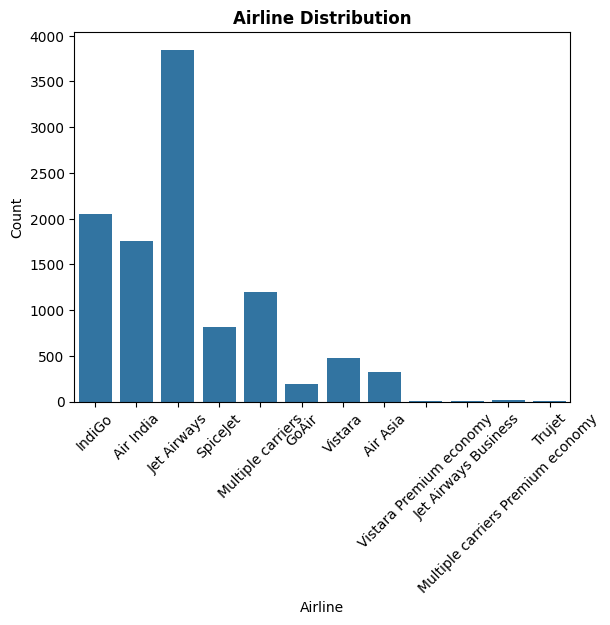

In [15]:
sns.countplot(x="Airline", data=df1)
plt.title("Airline Distribution", fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


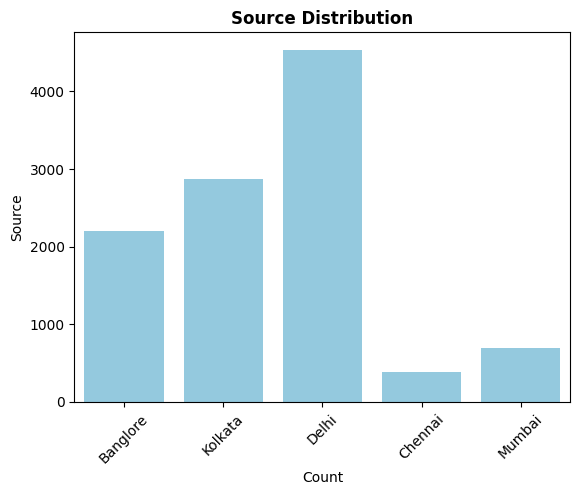

In [16]:
sns.countplot(x="Source", data=df1, color="skyblue")
plt.title("Source Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)
plt.show()

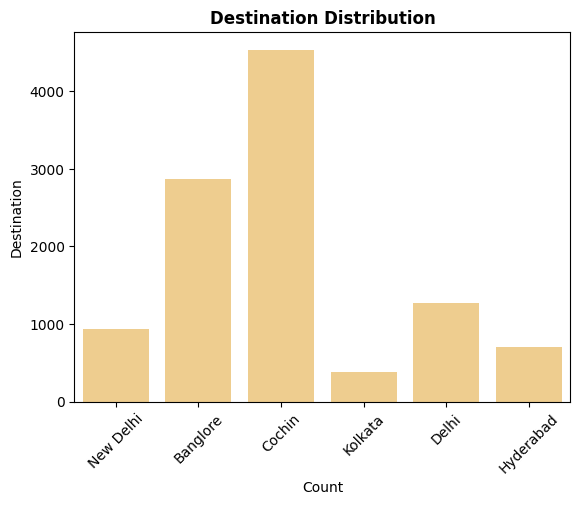

In [17]:
sns.countplot(x=df1["Destination"], color="orange", alpha=0.5)
plt.title("Destination Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()

In [18]:
top_routes = df1["Route"].value_counts().sort_values(ascending=False)[:10]
print(top_routes)

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64


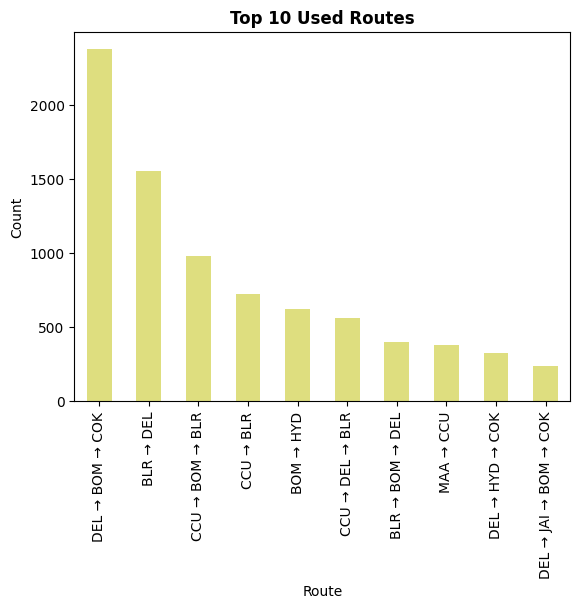

In [19]:
top_routes.plot(kind="bar", color="y", alpha=0.5)
plt.title("Top 10 Used Routes", fontweight="bold")
plt.ylabel("Count")
plt.show()

In [20]:
bottom_routes = df1["Route"].value_counts().sort_values(ascending=True)[:10]
print(bottom_routes)


Route
BOM → BBI → HYD                      1
BOM → RPR → VTZ → HYD                1
BLR → CCU → BBI → HYD → VGA → DEL    1
BLR → BOM → IXC → DEL                1
BLR → HBX → BOM → NAG → DEL          1
BOM → VNS → DEL → HYD                1
BOM → JAI → DEL → HYD                1
CCU → IXB → DEL → BLR                1
BOM → GOI → HYD                      1
BOM → DED → DEL → HYD                1
Name: count, dtype: int64


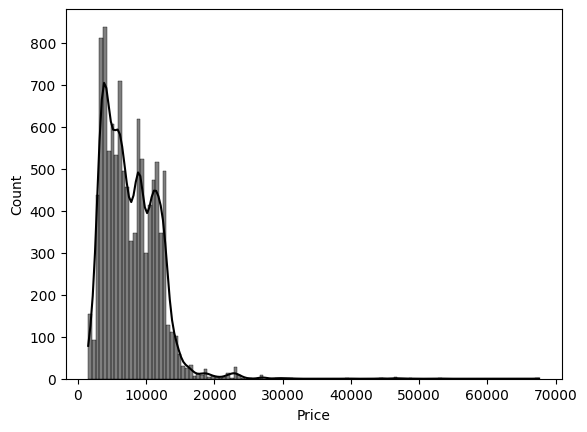

In [21]:
sns.histplot(x=df1["Price"], kde=True, color="black")
plt.show()


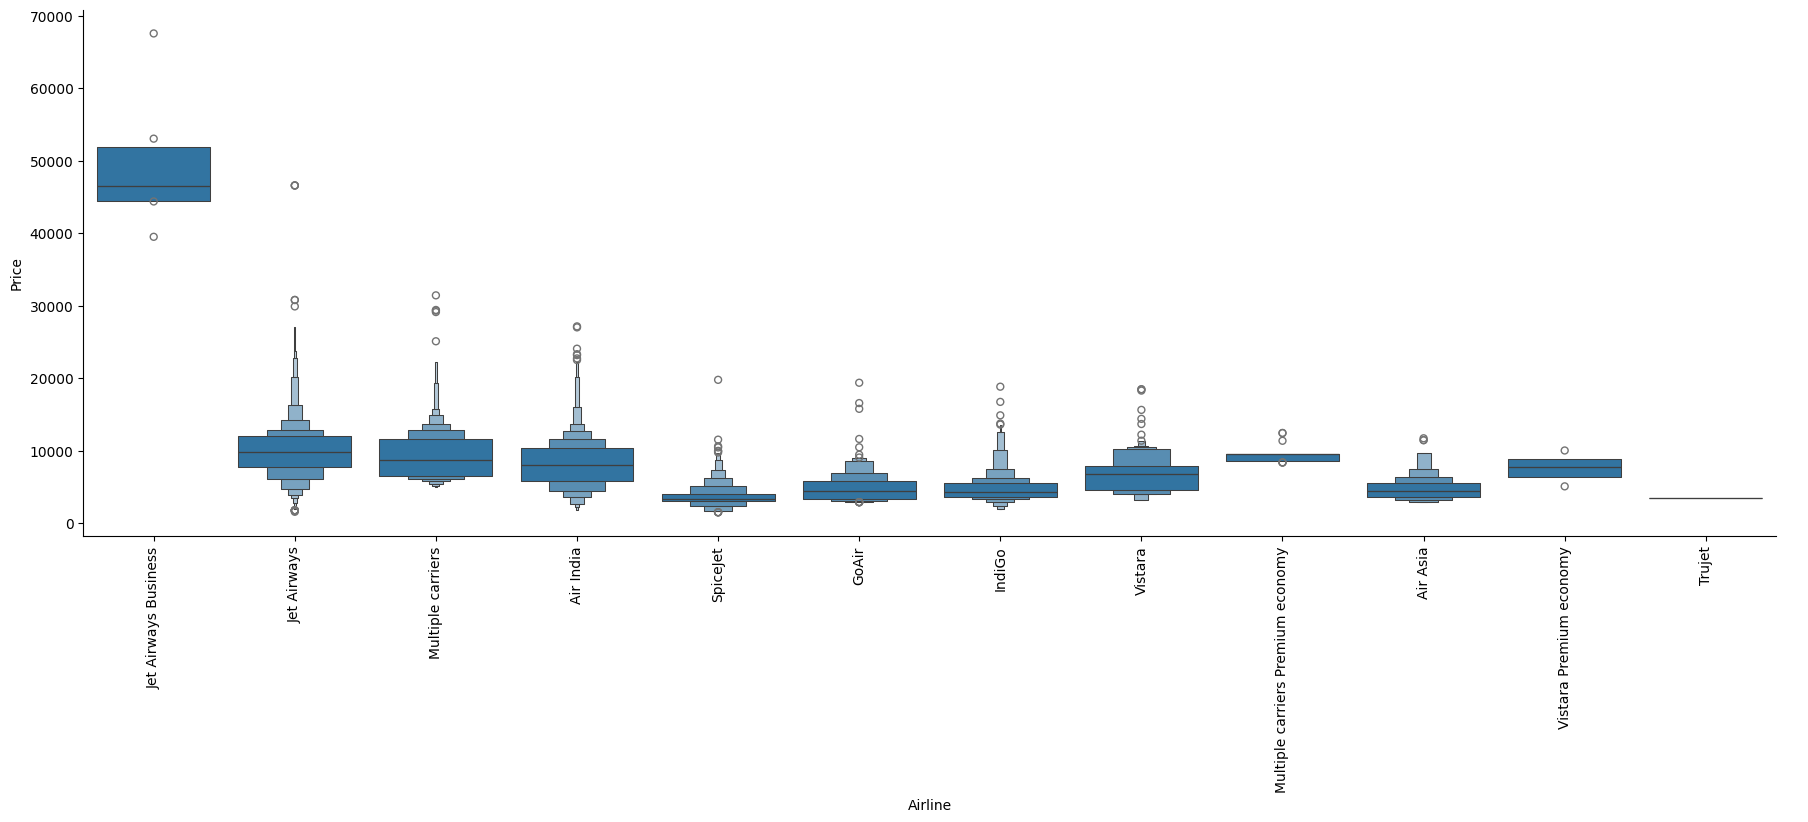

In [22]:
sns.catplot(x="Airline", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", height=6, aspect=3)
plt.xticks(rotation=90)
plt.show()


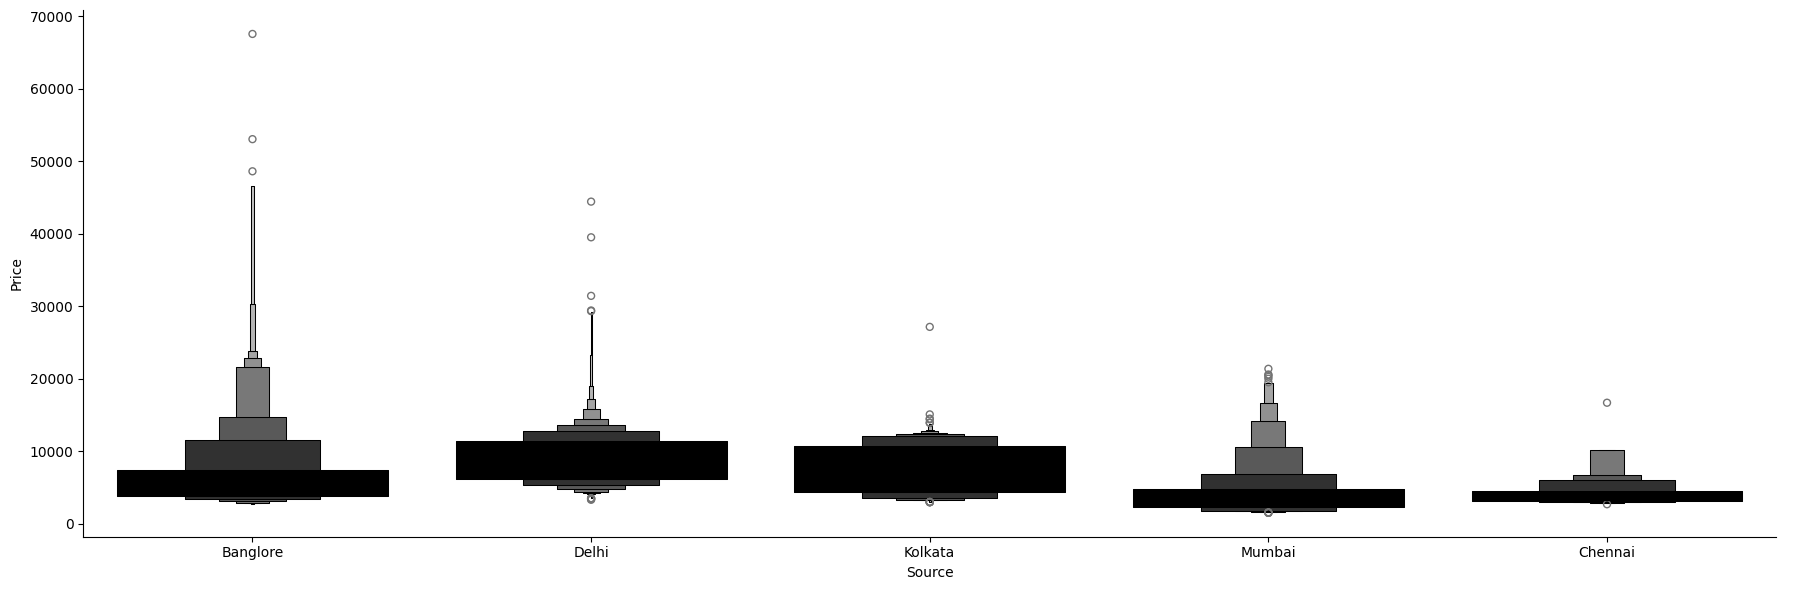

In [23]:
sns.catplot(x="Source", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", color="black", height=6, aspect=3)
plt.show()

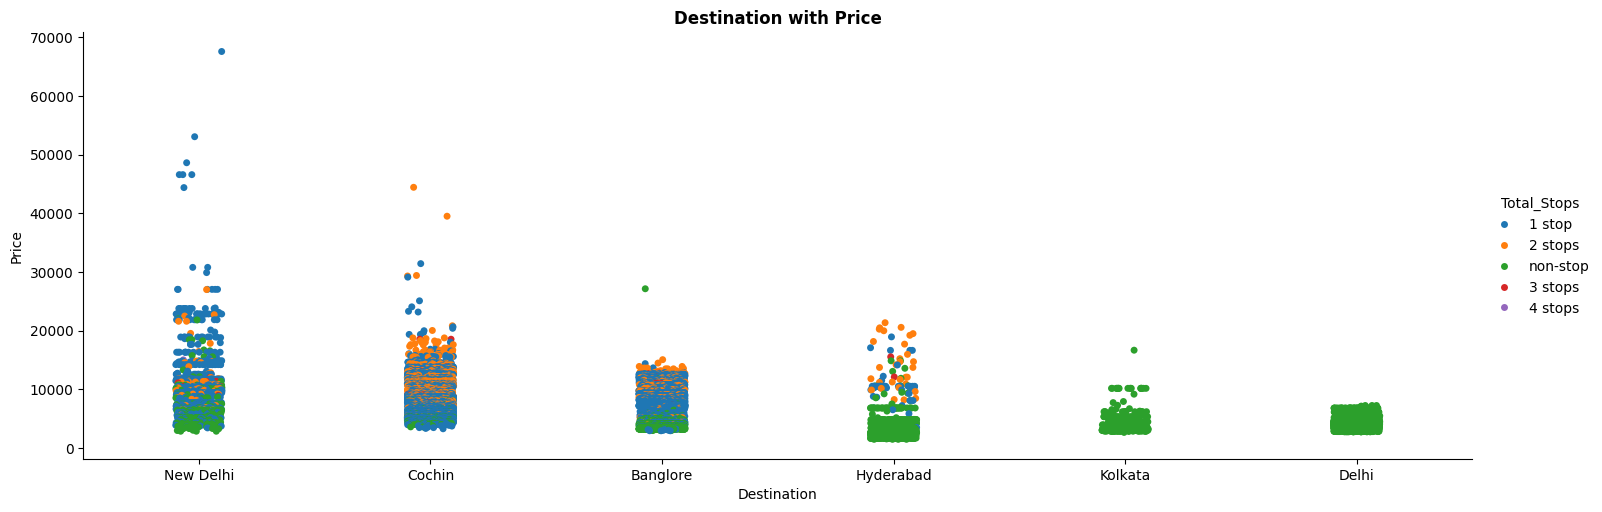

In [24]:
sns.catplot(x="Destination", y="Price", data=df1.sort_values("Price", ascending=False),
            hue="Total_Stops", aspect=3)
plt.title("Destination with Price", fontweight="bold")
plt.show()

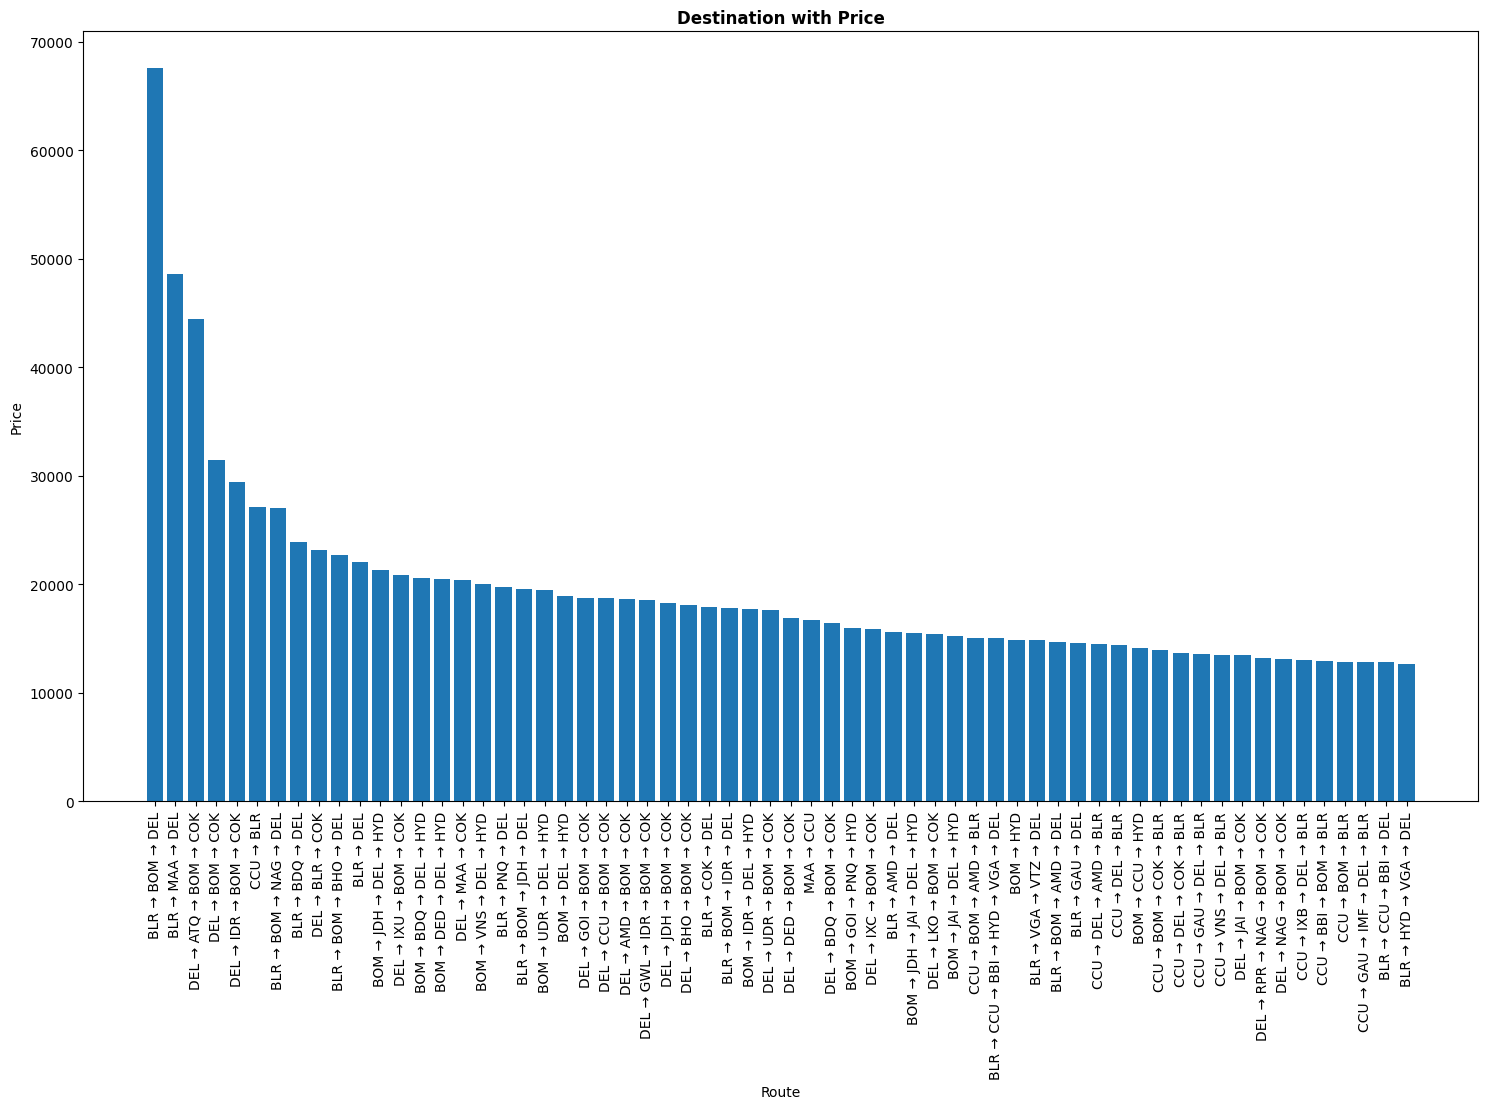

In [25]:
# most pricy routes
top_1000 = df1.sort_values("Price", ascending=False).head(1000)
plt.figure(figsize=(18, 10))
plt.bar(top_1000["Route"], top_1000["Price"])
plt.title("Destination with Price", fontweight="bold")
plt.xlabel("Route")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10683 non-null  int64  
 1   Airline          10683 non-null  object 
 2   Date_of_Journey  10683 non-null  object 
 3   Source           10683 non-null  object 
 4   Destination      10683 non-null  object 
 5   Route            10682 non-null  object 
 6   Dep_Time         10683 non-null  object 
 7   Arrival_Time     10683 non-null  object 
 8   Duration         10683 non-null  object 
 9   Total_Stops      10682 non-null  object 
 10  Additional_Info  10683 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1001.7+ KB


In [27]:
print(df1["Date_of_Journey"].unique())


['24/03/2024' '1/05/2024' '9/06/2024' '12/05/2024' '01/03/2024'
 '24/06/2024' '12/03/2024' '27/05/2024' '1/06/2024' '18/04/2024'
 '9/05/2024' '24/04/2024' '3/03/2024' '15/04/2024' '12/06/2024'
 '6/03/2024' '21/03/2024' '3/04/2024' '6/05/2024' '15/05/2024'
 '18/06/2024' '15/06/2024' '6/04/2024' '18/05/2024' '27/06/2024'
 '21/05/2024' '06/03/2024' '3/06/2024' '15/03/2024' '3/05/2024'
 '9/03/2024' '6/06/2024' '24/05/2024' '09/03/2024' '1/04/2024'
 '21/04/2024' '21/06/2024' '27/03/2024' '18/03/2024' '12/04/2024'
 '9/04/2024' '1/03/2024' '03/03/2024' '27/04/2024']


In [28]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"], format="%d/%m/%Y")
df1["Date"] = df1["Date_of_Journey"].dt.day
df1["Month"] = df1["Date_of_Journey"].dt.month
df1["Year"] = df1["Date_of_Journey"].dt.year 
df1.drop("Date_of_Journey", inplace=True, axis=1)


In [29]:
df1["Date"] = df1["Date"].astype(int)
df1["Month"] = df1["Month"].astype(int)
df1["Year"] = df1["Year"].astype(int)

In [30]:
if "Total_Stops" in df1.columns:
    df1.drop("Total_Stops", axis=1, inplace=True)

In [31]:
df1.head(4)

,Unnamed: 0,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No Info,3312.45,24,3,2024
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No Info,6512.70,1,5,2024
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No Info,11799.70,9,6,2024
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No Info,5285.30,12,5,2024


In [32]:
for col in ["Arrival_Time", "Arrival_hour", "Arrival_min"]:
    if col in df1.columns:
        df1.drop(col, axis=1, inplace=True)

In [33]:
df1.head(4)

,Unnamed: 0,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No Info,3312.45,24,3,2024
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No Info,6512.70,1,5,2024
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No Info,11799.70,9,6,2024
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No Info,5285.30,12,5,2024


In [34]:
print(df1["Dep_Time"].unique())

['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '21:20' '06:20' '1

In [35]:
df1["Dep_hour"] = df1["Dep_Time"].str.split(":").str[0]
df1["Dep_min"] = df1["Dep_Time"].str.split(":").str[1]
df1.drop("Dep_Time", axis=1, inplace=True)
df1["Dep_hour"] = df1["Dep_hour"].astype(int)
df1["Dep_min"] = df1["Dep_min"].astype(int)

In [36]:
df1.head(4)

,Unnamed: 0,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No Info,3312.45,24,3,2024,22,20
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No Info,6512.70,1,5,2024,5,50
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No Info,11799.70,9,6,2024,9,25
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No Info,5285.30,12,5,2024,18,5


In [37]:
print(df1["Additional_Info"].unique())


['No Info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']


In [38]:
df1["Additional_Info"] = df1["Additional_Info"].apply(lambda x: x.strip() if isinstance(x, str) else x)


In [39]:
print(df1.columns)


Index(['Unnamed: 0', 'Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_min'],
      dtype='object')


In [40]:
print(df1["Duration"].unique())


['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 10m' '15h 25m' '14h 5m' '20h 15m' '23h 10m'
 '18h 10m' '16h' '2h 20m' '8h' '16h 55m' '3h 10m' '14h' '23h 50m'
 '21h 40m' '21h 15m' '10h 50m' '8h 15m' '8h 35m' '11h 50m' '27h 35m'
 '8h 25m' '20h 55m' '4h 50m' '8h 10m' '24h 25m' '23h 35m' '25h 45m'
 '26h 10m' '28h 

In [41]:
df1["Duration_hour"] = df1["Duration"].str.split(" ").str[0]
df1["Duration_hour"] = df1["Duration_hour"].str.split("h").str[0]

df1["Duration_min"] = df1["Duration"].str.split(" ").str[1]
df1["Duration_min"] = df1["Duration_min"].str.split("m").str[0]

df1.drop("Duration", axis=1, inplace=True)

In [42]:
print(df1["Duration_min"].unique())
print(df1["Duration_hour"].unique())

['50' '25' nan '45' '30' '5' '15' '35' '10' '20' '55' '40']
['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '5m' '41' '40']


In [43]:
df1["Duration_min"] = df1["Duration_min"].replace(np.nan, "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m", "5")

df1["Duration_min"] = df1["Duration_min"].astype(int)
df1["Duration_hour"] = df1["Duration_hour"].astype(int)

In [44]:
print(df1["Route"].unique())


['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [45]:
df1["Route_1"] = df1["Route"].str.split(" → ").str[0]
df1["Route_2"] = df1["Route"].str.split(" → ").str[1]
df1["Route_3"] = df1["Route"].str.split(" → ").str[2]
df1["Route_4"] = df1["Route"].str.split(" → ").str[3]
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]

df1["Route_1"].fillna("None", inplace=True)
df1["Route_2"].fillna("None", inplace=True)
df1["Route_3"].fillna("None", inplace=True)
df1["Route_4"].fillna("None", inplace=True)
df1["Route_5"].fillna("None", inplace=True)

df1.drop("Route", axis=1, inplace=True)

In [46]:
df1.head(5)
df1.info()
print(df1.isnull().sum())
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10683 non-null  int64  
 1   Airline          10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Additional_Info  10683 non-null  object 
 5   Price            10683 non-null  float64
 6   Date             10683 non-null  int64  
 7   Month            10683 non-null  int64  
 8   Year             10683 non-null  int64  
 9   Dep_hour         10683 non-null  int64  
 10  Dep_min          10683 non-null  int64  
 11  Duration_hour    10683 non-null  int64  
 12  Duration_min     10683 non-null  int64  
 13  Route_1          10683 non-null  object 
 14  Route_2          10683 non-null  object 
 15  Route_3          10683 non-null  object 
 16  Route_4          10683 non-null  object 
 17  Route_5     

,Unnamed: 0,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,IndiGo,Banglore,New Delhi,No Info,3312.45,24,3,2024,22,20,2,50,BLR,DEL,None,None,None
1,1,Air India,Kolkata,Banglore,No Info,6512.70,1,5,2024,5,50,7,25,CCU,IXR,BBI,BLR,None
2,2,Jet Airways,Delhi,Cochin,No Info,11799.70,9,6,2024,9,25,19,0,DEL,LKO,BOM,COK,None
3,3,IndiGo,Kolkata,Banglore,No Info,5285.30,12,5,2024,18,5,5,25,CCU,NAG,BLR,None,None
4,4,IndiGo,Banglore,New Delhi,No Info,11306.70,1,3,2024,16,50,4,45,BLR,NAG,DEL,None,None


---

### Model Training


In [47]:
import numpy as np
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ( 
    ExtraTreesRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [48]:


df = pd.read_csv("data/train.csv")
df.drop(columns=["Route"], errors="ignore", inplace=True)
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
df["Date"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [49]:
def extract_time(t):
    return t.split()[0].strip()

if "Dep_Time" in df.columns:
    df.drop(["Dep_Time"], axis=1, inplace=True) 

def parse_duration(d):
    d = d.lower().strip()
    hours = 0
    mins = 0
    if "h" in d:
        parts = d.split("h")
        hours = int(parts[0])
        if "m" in parts[1]:
            mins = int(parts[1].replace("m", "").strip()) if parts[1] else 0
    elif "m" in d:
        mins = int(d.replace("m", "").strip())
    return hours, mins

In [50]:
df["Duration_hour"], df["Duration_min"] = zip(*df["Duration"].apply(parse_duration))
df.drop(["Duration"], axis=1, inplace=True)
if "Total_Stops" in df.columns:
    df.drop("Total_Stops", axis=1, inplace=True)
    
col_list = [
    "Airline", "Source", "Destination", "Additional_Info",
    "Date", "Month", "Year",
    "Dep_hour", "Dep_min",
    "Duration_hour", "Duration_min"
]

use_cols = [c for c in col_list if c in df.columns]
X = df[use_cols].copy()
y = df["Price"].copy()

In [51]:

for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].astype(str).str.strip()

encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

joblib.dump(encoders, "models/encoders.pkl")
print("Encoders saved successfully (Route excluded).")

Encoders saved successfully (Route excluded).


In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

joblib.dump(x_test, "models/x_test.pkl")
joblib.dump(y_test, "models/y_test.pkl")

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (7478, 9)
Shape of x_test: (3205, 9)
Shape of y_train: (7478,)
Shape of y_test: (3205,)


In [53]:
model_lasso = SelectFromModel(Lasso(alpha=0.005, max_iter=500, random_state=0))
model_lasso.fit(x_train, y_train)
print("Lasso-chosen columns:", x_train.columns[model_lasso.get_support()])

Lasso-chosen columns: Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Duration_hour', 'Duration_min'],
      dtype='object')


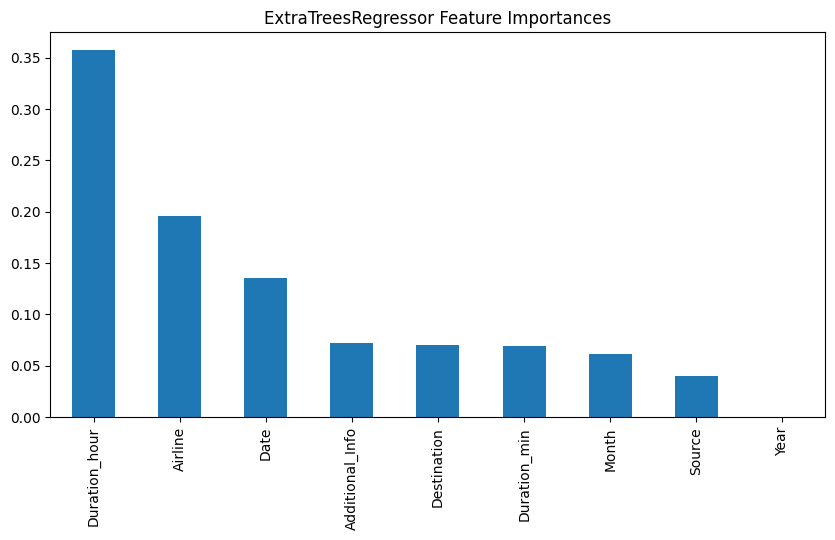

In [54]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

plt.figure(figsize=(10, 5))
feature_imp = pd.Series(etr.feature_importances_, index=x_train.columns)
feature_imp.nlargest(len(x_train.columns)).plot(kind="bar")
plt.title("ExtraTreesRegressor Feature Importances")
plt.show()

In [55]:
print("\nTraining ARIMA model...")
try:
    arima_model = ARIMA(y_train, order=(1,1,1))
    arima_result = arima_model.fit()
    y_pred_arima = arima_result.forecast(steps=len(y_test))
    r2_arima = r2_score(y_test, y_pred_arima)
    mae_arima = mean_absolute_error(y_test, y_pred_arima)
    mse_arima = mean_squared_error(y_test, y_pred_arima)
    rmse_arima = np.sqrt(mse_arima)
    print(f"ARIMA -> R2: {r2_arima:.4f}, MAE: {mae_arima:.4f}, MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}")
except Exception as e:
    print("ARIMA model failed:", e)
    r2_arima = mae_arima = mse_arima = rmse_arima = None


Training ARIMA model...
ARIMA -> R2: -0.0006, MAE: 3095.1376, MSE: 14602647.7520, RMSE: 3821.3411


In [56]:
print("\nTraining PyTorch LSTM model...")
try:
    X_train_lstm = torch.tensor(x_train.values, dtype=torch.float32).unsqueeze(1)
    X_test_lstm = torch.tensor(x_test.values, dtype=torch.float32).unsqueeze(1)
    y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
    y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    class LSTMRegressor(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_layers=1):
            super(LSTMRegressor, self).__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, 1)
        def forward(self, x):
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            out = self.fc(out)
            return out

    input_dim = x_train.shape[1]
    hidden_dim = 50
    lstm_model = LSTMRegressor(input_dim, hidden_dim)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
    epochs = 50
    batch_size = 32

    lstm_model.train()
    for epoch in range(epochs):
        permutation = torch.randperm(X_train_lstm.size(0))
        epoch_loss = 0
        for i in range(0, X_train_lstm.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x = X_train_lstm[indices]
            batch_y = y_train_t[indices]
            optimizer.zero_grad()
            outputs = lstm_model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # Optionally print loss:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    
    lstm_model.eval()
    with torch.no_grad():
        y_pred_lstm = lstm_model(X_test_lstm).squeeze().numpy()

    r2_lstm = r2_score(y_test, y_pred_lstm)
    mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    print(f"LSTM -> R2: {r2_lstm:.4f}, MAE: {mae_lstm:.4f}, MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}")
except Exception as e:
    print("LSTM model failed:", e)
    r2_lstm = mae_lstm = mse_lstm = rmse_lstm = None


Training PyTorch LSTM model...
Epoch 1/50, Loss: 17733502464.0000
Epoch 2/50, Loss: 17724365816.0000
Epoch 3/50, Loss: 17720241796.0000
Epoch 4/50, Loss: 17705007384.0000
Epoch 5/50, Loss: 17710759696.0000
Epoch 6/50, Loss: 17701044448.0000
Epoch 7/50, Loss: 17692942736.0000
Epoch 8/50, Loss: 17710022132.0000
Epoch 9/50, Loss: 17684381148.0000
Epoch 10/50, Loss: 17682006276.0000
Epoch 11/50, Loss: 17668661368.0000
Epoch 12/50, Loss: 17657291508.0000
Epoch 13/50, Loss: 17655938040.0000
Epoch 14/50, Loss: 17647244760.0000
Epoch 15/50, Loss: 17633787664.0000
Epoch 16/50, Loss: 17635336452.0000
Epoch 17/50, Loss: 17621542220.0000
Epoch 18/50, Loss: 17618888244.0000
Epoch 19/50, Loss: 17615136292.0000
Epoch 20/50, Loss: 17606279812.0000
Epoch 21/50, Loss: 17600983336.0000
Epoch 22/50, Loss: 17592906260.0000
Epoch 23/50, Loss: 17590892748.0000
Epoch 24/50, Loss: 17574269208.0000
Epoch 25/50, Loss: 17579071308.0000
Epoch 26/50, Loss: 17565584796.0000
Epoch 27/50, Loss: 17558705492.0000
Epoch

In [57]:
def evaluate_model(clf, x_tr, y_tr, x_te, y_te):
    clf.fit(x_tr, y_tr)
    preds = clf.predict(x_te)
    r2 = r2_score(y_te, preds)
    mae = mean_absolute_error(y_te, preds)
    mse = mean_squared_error(y_te, preds)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [58]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

In [59]:
results = {}
for name, reg in models.items():
    r2_s, mae_s, mse_s, rmse_s = evaluate_model(reg, x_train, y_train, x_test, y_test)
    results[name] = {"R2": r2_s, "MAE": mae_s, "MSE": mse_s, "RMSE": rmse_s}

if r2_arima is not None:
    results["ARIMA"] = {"R2": r2_arima, "MAE": mae_arima, "MSE": mse_arima, "RMSE": rmse_arima}
if r2_lstm is not None:
    results["LSTM"] = {"R2": r2_lstm, "MAE": mae_lstm, "MSE": mse_lstm, "RMSE": rmse_lstm}

results_df = pd.DataFrame.from_dict(results, orient="index")
print("\nComparison of models:\n", results_df)

best_model_name = max({k: v for k, v in results.items() if k not in ["ARIMA", "LSTM"]}, key=lambda nm: results[nm]["R2"])
best_model = models[best_model_name]
best_model.fit(x_train, y_train)
joblib.dump(best_model, "models/best_model.pkl")
print(f"\n'{best_model_name}' is the best sklearn model, saved to 'models/best_model.pkl'.")


Comparison of models:
                         R2          MAE           MSE         RMSE
RandomForest      0.805429   818.009568  2.839439e+06  1685.063584
GradientBoosting  0.805185  1156.297590  2.843002e+06  1686.120378
DecisionTree      0.712852   898.931390  4.190455e+06  2047.060200
SVR              -0.016727  3052.637119  1.483747e+07  3851.943202
ARIMA            -0.000636  3095.137573  1.460265e+07  3821.341093
LSTM             -3.920684  7564.123843  7.180933e+07  8474.038815

'RandomForest' is the best sklearn model, saved to 'models/best_model.pkl'.
